<a href="https://colab.research.google.com/github/noha2002/noha/blob/main/classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
!pip3 install numpy
!pip3 install matplotlib
!pip3 install pandas


In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LogisticRegression

In [12]:
dataset = pd.read_csv('loan_test.csv')
dataset.describe()


,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History
count,3.670000e+02,3.670000e+02,3.670000e+02,361.000000,338.000000
mean,4.805599e+05,1.569578e+05,1.342779e+07,342.537396,0.825444
std,4.910685e+05,2.334232e+05,6.296143e+06,65.156643,0.380150
min,0.000000e+00,0.000000e+00,0.000000e+00,6.000000,0.000000
25%,2.864000e+05,0.000000e+00,1.000000e+07,360.000000,1.000000
50%,3.786000e+05,1.025000e+05,1.250000e+07,360.000000,1.000000
75%,5.060000e+05,2.430500e+05,1.575000e+07,360.000000,1.000000
max,7.252900e+06,2.400000e+06,5.500000e+07,480.000000,1.000000


In [13]:
len(dataset)

367

In [14]:
dataset.head()

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History,Area,loan
0,Male,Yes,0,Graduate,No,572000,0,11000000,360.0,1.0,Urban,no
1,Male,Yes,1,Graduate,No,307600,150000,12600000,360.0,1.0,Urban,yes
2,Male,Yes,2,Graduate,No,500000,180000,20800000,360.0,1.0,Urban,no
3,Male,Yes,2,Graduate,No,234000,254600,10000000,360.0,NaN,Urban,yes
4,Male,No,0,Not Graduate,No,327600,0,7800000,360.0,1.0,Urban,no


In [16]:
dataset.dtypes

Gender                 object
Married                object
Dependents             object
Education              object
Self_Employed          object
Applicant_Income        int64
Coapplicant_Income      int64
Loan_Amount             int64
Term                  float64
Credit_History        float64
Area                   object
loan                   object
dtype: object

In [17]:
X = dataset.iloc[:,:].values
X[:, 1:]

array([['Yes', '0', 'Graduate', ..., 1.0, 'Urban', 'no'],
       ['Yes', '1', 'Graduate', ..., 1.0, 'Urban', 'yes'],
       ['Yes', '2', 'Graduate', ..., 1.0, 'Urban', 'no'],
       ...,
       ['No', '0', 'Graduate', ..., nan, 'Semiurban', 'no'],
       ['Yes', '0', 'Graduate', ..., 1.0, 'Rural', 'no'],
       ['No', '0', 'Graduate', ..., 1.0, 'Rural', 'no']], dtype=object)

In [18]:
dataset.isnull().sum().sum()


80

In [25]:
!pip3 install -U scikit-learn
!pip install --upgrade scikit-learn


In [43]:
#حليت الmissing value بطريقه تانيه بس مش همسح الكود عشان تعبت فيه
# from sklearn.impute import SimpleImputer

# numeric_imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

# numeric_columns = [ 5, 6,7,8,9]

# numeric_imputer.fit(X[:, numeric_columns])
# X[:, numeric_columns] = numeric_imputer.transform(X[:, numeric_columns])

In [44]:
# from sklearn.impute import SimpleImputer

# categorical_imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

# categorical_columns = [0,1,2,3,4,10,11]

# categorical_imputer.fit(X[:, categorical_columns])
# X[:, categorical_columns] = categorical_imputer.transform(X[:, categorical_columns])

In [45]:
# from sklearn.impute import SimpleImputer
# imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
# imputer.fit(X[:, :])
# X[:, :] = imputer.transform(X[:, :])

In [17]:
dataset_cleaned_rows = dataset.dropna()

In [18]:
dataset.isnull().sum()

Gender                11
Married                0
Dependents            10
Education              0
Self_Employed         23
Applicant_Income       0
Coapplicant_Income     0
Loan_Amount            0
Term                   6
Credit_History        29
Area                   0
loan                   1
dtype: int64

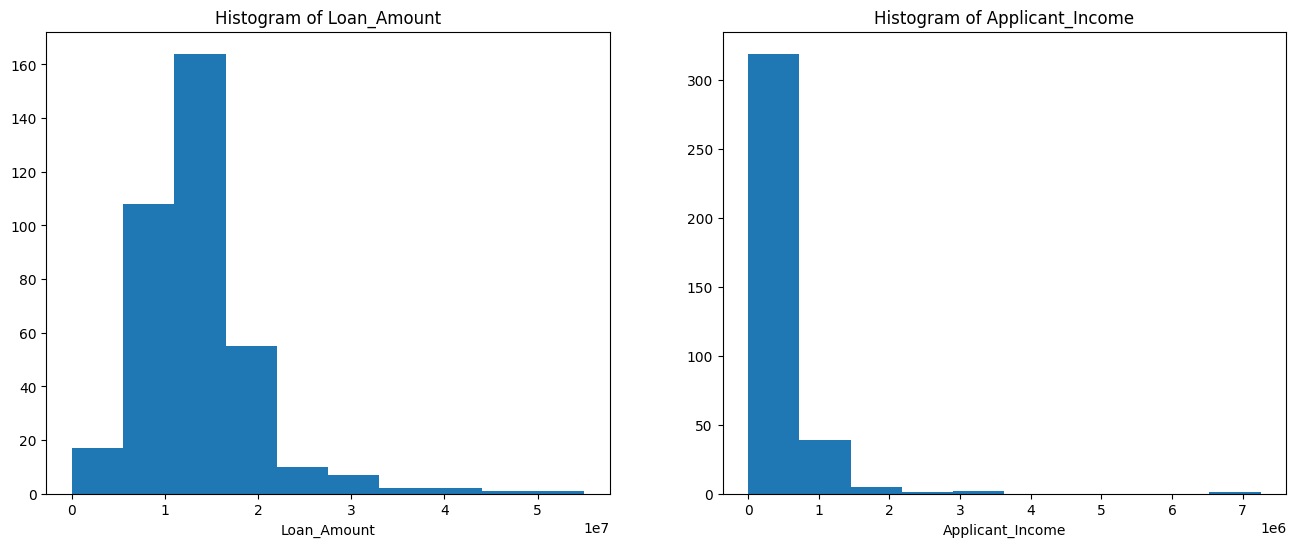

In [20]:
fig = plt.figure(figsize=(16, 6))
Loan_Amount = fig.add_subplot(121)
Applicant_Income = fig.add_subplot(122)

Loan_Amount.hist(dataset.Loan_Amount, bins=10)
Loan_Amount.set_xlabel('Loan_Amount')
Loan_Amount.set_title("Histogram of Loan_Amount")

Applicant_Income.hist(dataset.Applicant_Income, bins=10)
Applicant_Income.set_xlabel('Applicant_Income')
Applicant_Income.set_title("Histogram of Applicant_Income")

plt.show()


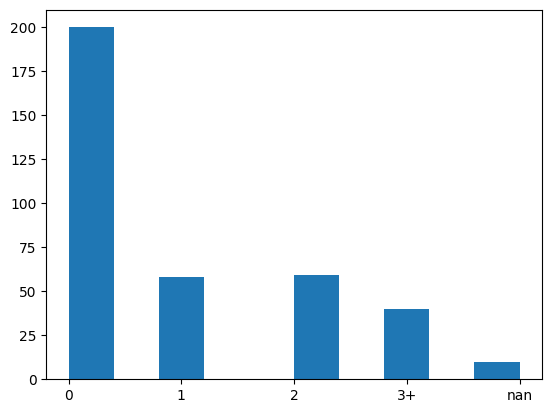

In [30]:
import matplotlib.pyplot as plt

dataset['Dependents'] = dataset['Dependents'].astype(str)

fig = plt.hist(dataset['Dependents'])
plt.show()

In [23]:
nan = []
for column in dataset.columns:
  if dataset[column].isna().sum():
    nan.append(column)
print(nan)

['Gender', 'Self_Employed', 'Term', 'Credit_History', 'loan']


In [32]:
nan_columns = ['Gender', 'Self_Employed', 'Term', 'Credit_History', 'loan']
for column in nan_columns:
    if dataset[column].dtype == 'O':
        dataset[column].fillna(dataset[column].mode()[0], inplace=True)
    else:
        dataset[column].fillna(dataset[column].mean(), inplace=True)

In [48]:
dataset.isnull().sum()

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
Applicant_Income      0
Coapplicant_Income    0
Loan_Amount           0
Term                  0
Credit_History        0
Area                  0
loan                  0
dtype: int64

In [30]:
dataset.isnull().sum().sum()

0

In [32]:
dataset.Self_Employed.value_counts()

No     330
Yes     37
Name: Self_Employed, dtype: int64

In [33]:
from sklearn.preprocessing import LabelEncoder
columns_to_encode = [ 'Married', 'Dependents' , 'Education'  ,'Area']


label_encoder = LabelEncoder()
dataset[columns_to_encode] = dataset[columns_to_encode].apply(label_encoder.fit_transform)

In [34]:
columns_to_encode = ['Gender', 'Self_Employed','loan']
label_encoder = LabelEncoder()
dataset[columns_to_encode] = dataset[columns_to_encode].apply(label_encoder.fit_transform)

In [35]:
dataset.head()

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History,Area,loan
0,1,1,0,0,0,572000,0,11000000,360.0,1.000000,2,0
1,1,1,1,0,0,307600,150000,12600000,360.0,1.000000,2,1
2,1,1,2,0,0,500000,180000,20800000,360.0,1.000000,2,0
3,1,1,2,0,0,234000,254600,10000000,360.0,0.825444,2,1
4,1,0,0,1,0,327600,0,7800000,360.0,1.000000,2,0


In [36]:
X=dataset.drop('loan',axis=1)
y=dataset['loan']

In [37]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from sklearn.datasets import load_iris
data = load_iris()
X = data.data
y = data.target

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


y_pred = model.predict(X_test)



In [41]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print('Confusion Matrix:\n', conf_matrix)
print('Classification Report:\n', classification_rep)

Accuracy: 1.00
Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



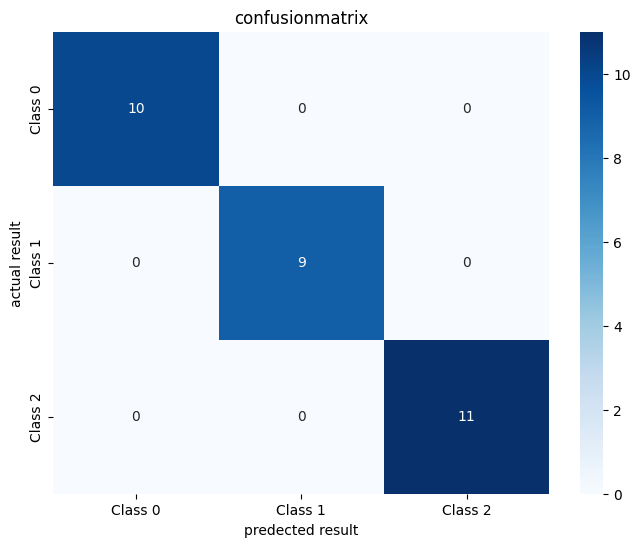

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix


conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0','Class 1', 'Class 2'], yticklabels=['Class 0','Class 1', 'Class 2'])
plt.xlabel('predected result')
plt.ylabel('actual result')
plt.title('confusionmatrix')
plt.show()


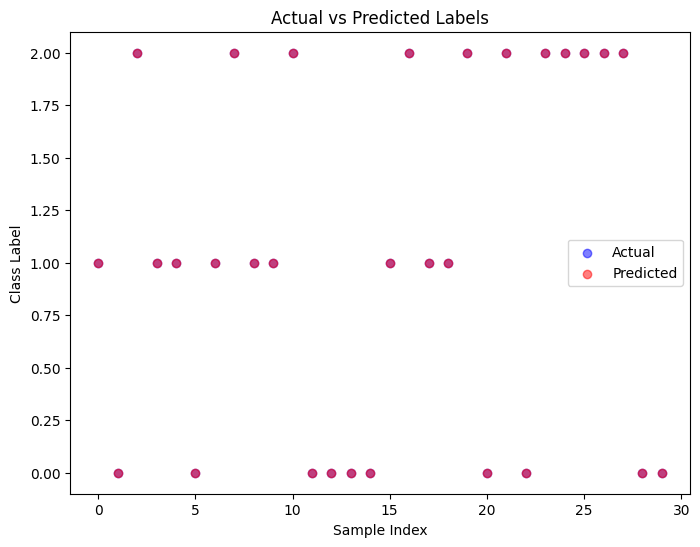

In [7]:
plt.figure(figsize=(8, 6))
plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual', alpha=0.5)
plt.scatter(range(len(y_pred)), y_pred, color='red', label='Predicted', alpha=0.5)
plt.title('Actual vs Predicted Labels')
plt.xlabel('Sample Index')
plt.ylabel('Class Label')
plt.legend()
plt.show()
